# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 18.11.2022

Мягий дедлайн: 23:59MSK 30.11.2022

Жестокий дедлайн: 23:59MSK 06.12.2022

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/43413/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке (я зафейлил, так что я **NoMoreActimel**)

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 11

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

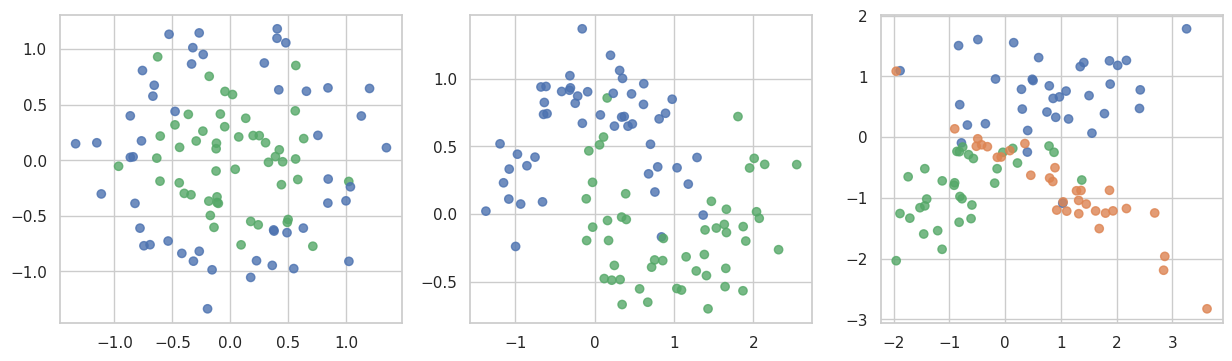

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

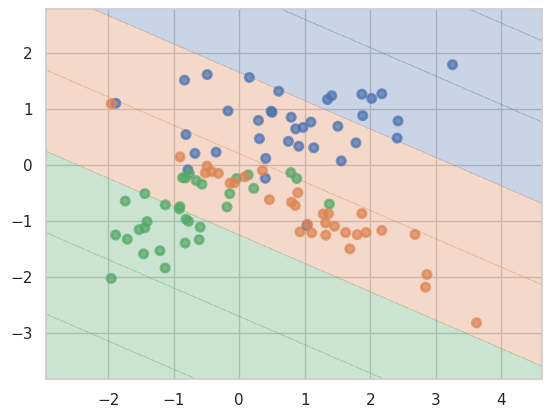

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import accuracy_score, average_precision_score

In [8]:
datasets_list = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [9]:
datasets = {k: v for k, v in zip(['circles', 'moons', 'classification'], datasets_list)}
Xs = {k: v[0] for k, v in datasets.items()}
ys = {k: v[1] for k, v in datasets.items()}

In [10]:
Xs_train, Xs_test, ys_train, ys_test = dict(), dict(), dict(), dict()

for name, dataset in datasets.items():
    Xs_train[name], Xs_test[name], ys_train[name], ys_test[name] = \
        train_test_split(dataset[0], dataset[1], test_size=0.2, random_state=42)

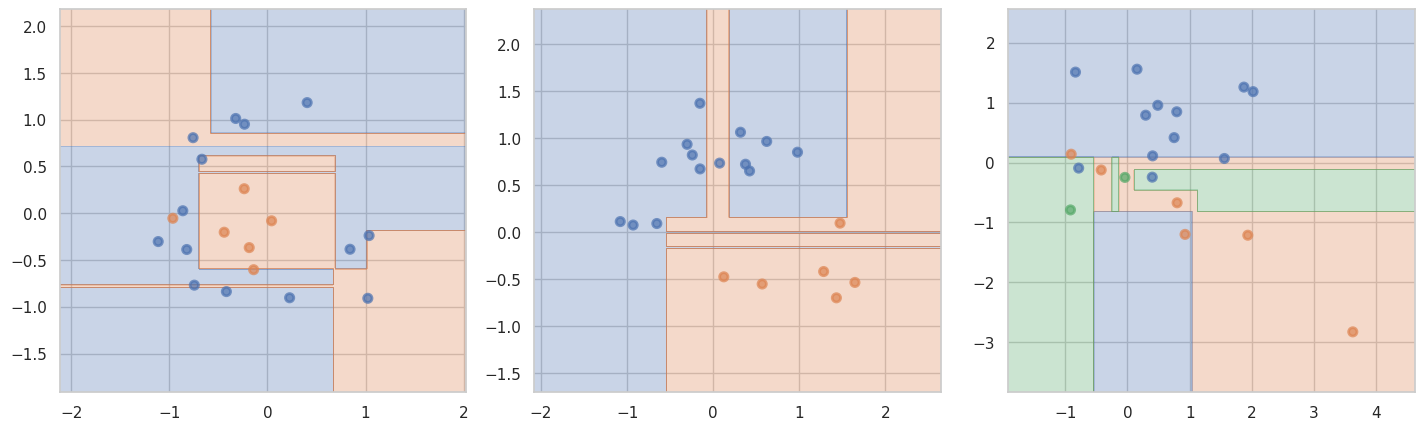

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

accuracies = dict()
for i, name in enumerate(datasets.keys()):
    tr = DecisionTreeClassifier(random_state=42)
    tr.fit(Xs_train[name], ys_train[name])
    accuracies[name] = (accuracy_score(ys_train[name], tr.predict(Xs_train[name])),
                        accuracy_score(ys_test[name], tr.predict(Xs_test[name])))
    plt.sca(axes[i])
    plot_surface(tr, Xs_test[name], ys_test[name])

In [12]:
for name, scores in accuracies.items():
    alignment = 24
    print(f"{f'{name.upper()} dataset': <{alignment}}")
    print(f"{f'Accuracy score on train:': <{alignment}} {scores[0]}")
    print(f"{f'Accuracy score on test:': <{alignment}} {scores[1]}\n")

CIRCLES dataset         
Accuracy score on train: 1.0
Accuracy score on test:  0.65

MOONS dataset           
Accuracy score on train: 1.0
Accuracy score on test:  0.95

CLASSIFICATION dataset  
Accuracy score on train: 1.0
Accuracy score on test:  0.7



__Ответ:__ переобучилось заметно (сильно заметно).

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [ ]:
from sklearn.model_selection import GridSearchCV

Testing with: max_depth = 1, min_samples_leaf = 1
Accuracy on CIRCLES dataset, train: 0.7, test: 0.45
Accuracy on MOONS dataset, train: 0.825, test: 0.85
Accuracy on CLASSIFICATION dataset, train: 0.6625, test: 0.55

Testing with: max_depth = 1, min_samples_leaf = 3
Accuracy on CIRCLES dataset, train: 0.7, test: 0.45
Accuracy on MOONS dataset, train: 0.825, test: 0.85
Accuracy on CLASSIFICATION dataset, train: 0.6625, test: 0.55

Testing with: max_depth = 1, min_samples_leaf = 5
Accuracy on CIRCLES dataset, train: 0.7, test: 0.45
Accuracy on MOONS dataset, train: 0.825, test: 0.85
Accuracy on CLASSIFICATION dataset, train: 0.6625, test: 0.55

Testing with: max_depth = 1, min_samples_leaf = 7
Accuracy on CIRCLES dataset, train: 0.7, test: 0.45
Accuracy on MOONS dataset, train: 0.825, test: 0.85
Accuracy on CLASSIFICATION dataset, train: 0.6625, test: 0.55

Testing with: max_depth = 1, min_samples_leaf = 10
Accuracy on CIRCLES dataset, train: 0.7, test: 0.45
Accuracy on MOONS dataset, tr

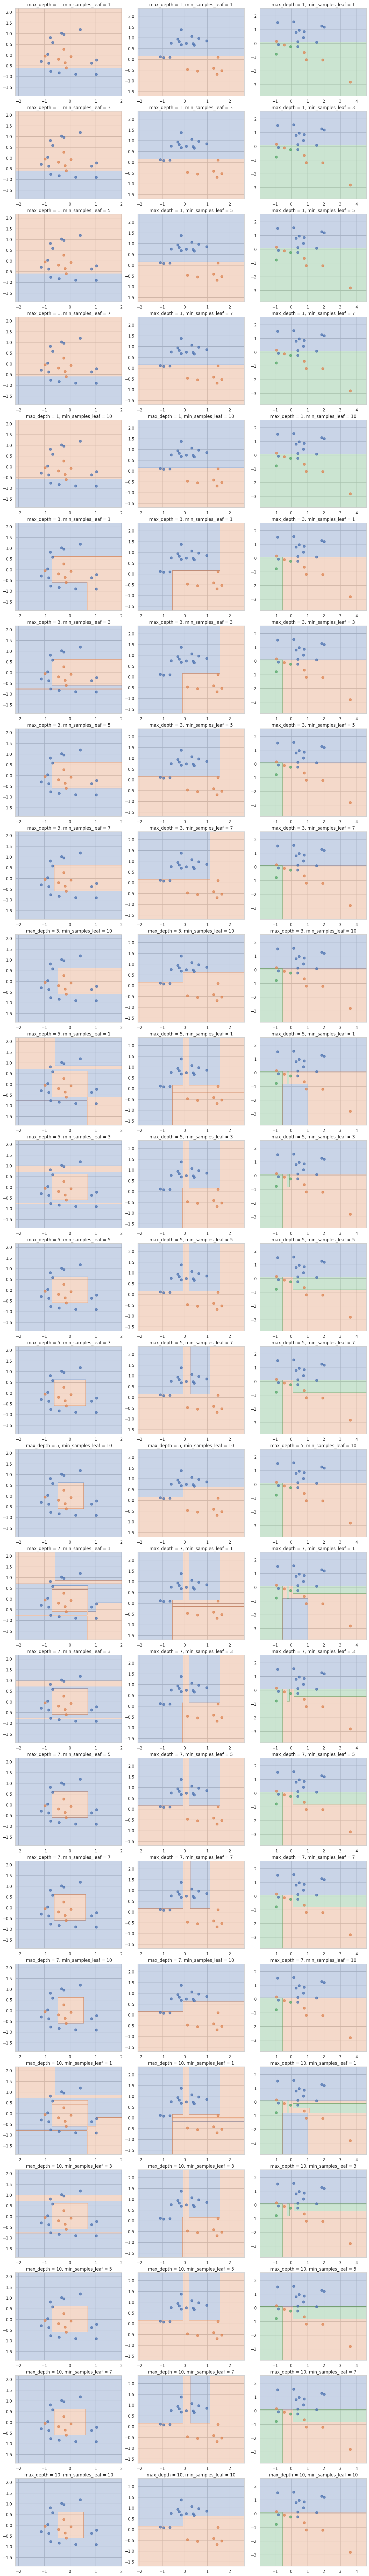

In [24]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

param_grid = {
    'max_depth': np.linspace(1, 10, 5, dtype=int),
    'min_samples_leaf': np.linspace(1, 10, 5, dtype=int),
    # 'min_weight_fraction_leaf': np.linspace(0.1, 0.9, 5)
}

number_of_hyperparams = np.prod([param.size for param in param_grid.values()])
fig, axes = plt.subplots(number_of_hyperparams, 3, figsize=(15, 100))
axes_row_ind = 0

accuracies = {name: {} for name in datasets.keys()}

for max_depth in param_grid['max_depth']:
    for min_samples_leaf in param_grid['min_samples_leaf']:
        print(f'Testing with: max_depth = {max_depth}, min_samples_leaf = {min_samples_leaf}')
        for i, name in enumerate(datasets.keys()):
            tr = DecisionTreeClassifier(random_state=42)
            tr.set_params(**{
                'max_depth': max_depth,
                'min_samples_leaf': min_samples_leaf
            })

            tr.fit(Xs_train[name], ys_train[name])
            accuracy_train = accuracy_score(ys_train[name], tr.predict(Xs_train[name]))
            accuracy_test = accuracy_score(ys_test[name], tr.predict(Xs_test[name]))
            accuracies[name][(max_depth, min_samples_leaf)] = (accuracy_train, accuracy_test)

            print(f'Accuracy on {name.upper()} dataset, train: {accuracy_train}, test: {accuracy_test}')
            plt.sca(axes[axes_row_ind, i])
            axes[axes_row_ind, i].set_title(
                f'max_depth = {max_depth}, min_samples_leaf = {min_samples_leaf}'
            )
            plot_surface(tr, Xs_test[name], ys_test[name])

        print()
        axes_row_ind += 1

__Ответ:__ самыми адекватными выглядят min_samples_leaf = 10, а max_depth = 5 or 7 or 10

Ярко заметно сглаживание засчёт min_samples_leaf при достаточной максимальной глубине дерева. Но что глубина 5, что 10 - ощутимой разницы нет. А для circles с такими глубинами и min_samples_leaf не особо влияeт на промежутке 5, 7, 10.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

[Посылка в контесте](https://contest.yandex.ru/contest/43413/run-report/77430827/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
from hw5code import find_best_split

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [3]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_students = pd.read_csv('students.csv')
X, y = df_students.iloc[:, :-1], df_students.iloc[:, -1]

STG: best_threshold = 0.615, 	best_gini = -0.45397707504410645
SCG: best_threshold = 0.425, 	best_gini = -0.4650194980401841
STR: best_threshold = 0.365, 	best_gini = -0.46733829445545116
LPR: best_threshold = 0.39, 	best_gini = -0.4546683192930121
PEG: best_threshold = 0.335, 	best_gini = -0.0860656027491214


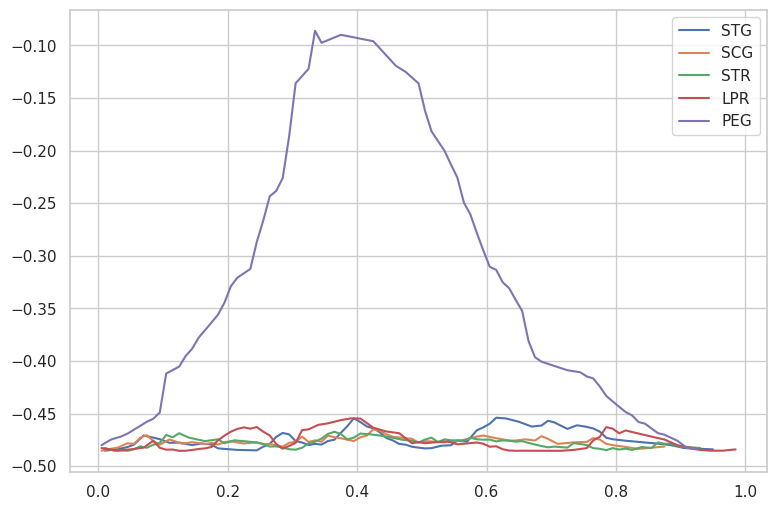

In [24]:
fig, ax = plt.subplots(figsize=(9, 6))

for column in X.columns:
    thresholds, ginis, best_threshold, best_gini = find_best_split(X.loc[:, column], y)
    print(f'{column}: best_threshold = {best_threshold}, \tbest_gini = {best_gini}')
    ax.plot(thresholds, ginis, label=column)

ax.legend()
plt.show()

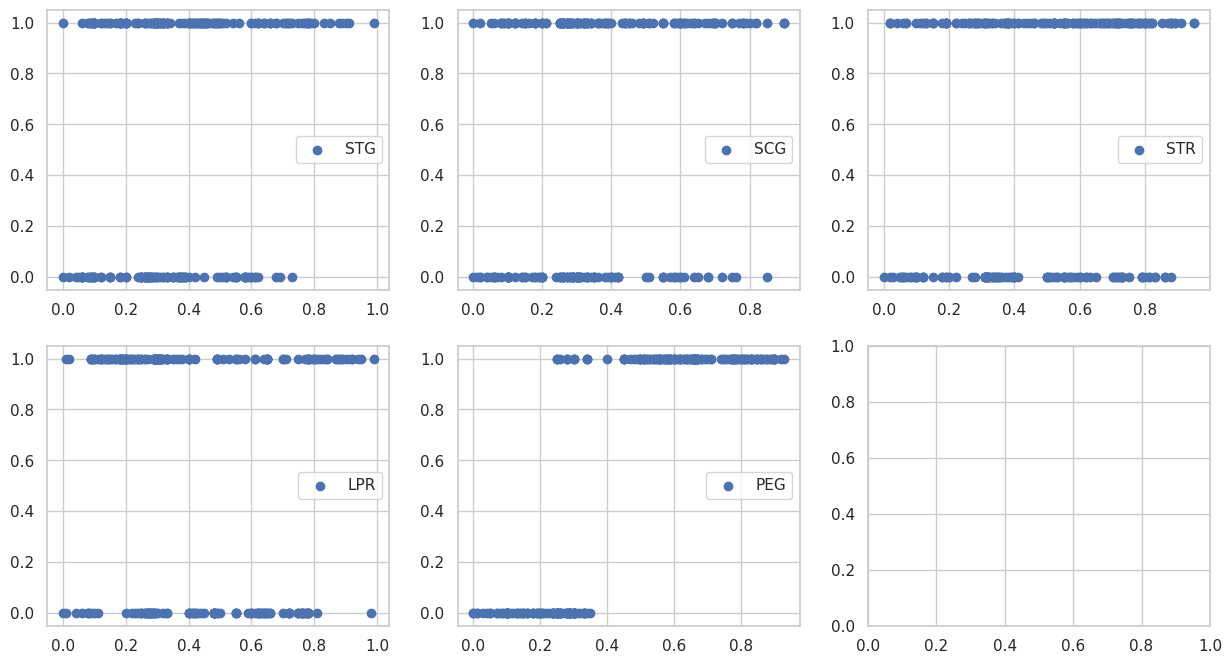

In [49]:
fig, axes = plt.subplots((len(X.columns) + 1) // 3, 3, figsize=(15, 8))

for i, column in enumerate(X.columns):
    axes[i // 3, i % 3].scatter(X.loc[:, column], y, label=column)
    axes[i // 3, i % 3].legend([column], loc='center right')

plt.show()

In [5]:
from collections import Counter

y = np.array([1, 0, 1, 1, 0, 0, 1, 0])
for k, v in Counter(y).items():
    print(k, v)

1 4
0 4


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** все графики говорят нам об одном - PEG лучшая колонка для деления, причём с большим отрывом от остальных. Кривая значений критерия должна выглядеть как горб - она и выглядит; графики по беспонтовым фичам должны выглядеть +- ровно, так как изменение трэшхолда не должно давать ощутимых изменений в качестве деления.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

[Посылка в контесте](https://contest.yandex.ru/contest/43413/run-report/77430797/)

In [ ]:
# ТЕСТИРОВАНИЕ

In [3]:
import numpy as np
from hw5code import DecisionTree

In [3]:
with open('./Tests/B/10', 'r') as input_file:
    with open('./Tests/B/10.a', 'r') as answer_file:
        feature_types = input_file.readline().split()

        def get_X():
            data = list(map(float, input_file.readline().split()))
            n = len(feature_types)
            m = len(data) // n

            for i, element in enumerate(data):
                if feature_types[i % n] == 'categorical':
                    data[i] = int(element)

            return np.array([np.array([data[n * i + j] for j in range(n)]) for i in range(m)])

        X_train = get_X()
        y_train = np.array(list(map(int, input_file.readline().split())))
        X_test = get_X()

        dt = DecisionTree(feature_types)
        dt.fit(X_train, y_train)
        print(dt.predict(X_test))

[0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1
 0 0 1 1 0 1 1 0 0 0 1 0 1]


__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [28]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', names=[i for i in range(23)])
df_mushrooms = df_mushrooms.apply(LabelEncoder().fit_transform)
X, y = df_mushrooms.iloc[:, 1:], df_mushrooms.iloc[:, 0]
X, y = X.to_numpy(), y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [31]:
dt = DecisionTree(feature_types=['categorical' for _ in range(X.shape[1])])
dt.fit(X_train, y_train)
y_test_predict = dt.predict(X_test)
print(f'Accuracy on test dataset: {accuracy_score(y_test, y_test_predict)}')

Accuracy on test dataset: 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [5]:
df_ttt = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data',
    names=list(range(10))
)
df_ttt = df_ttt.apply(LabelEncoder().fit_transform)
X_ttt = df_ttt.iloc[:, :-1].to_numpy()
y_ttt = df_ttt.iloc[:, -1].to_numpy()

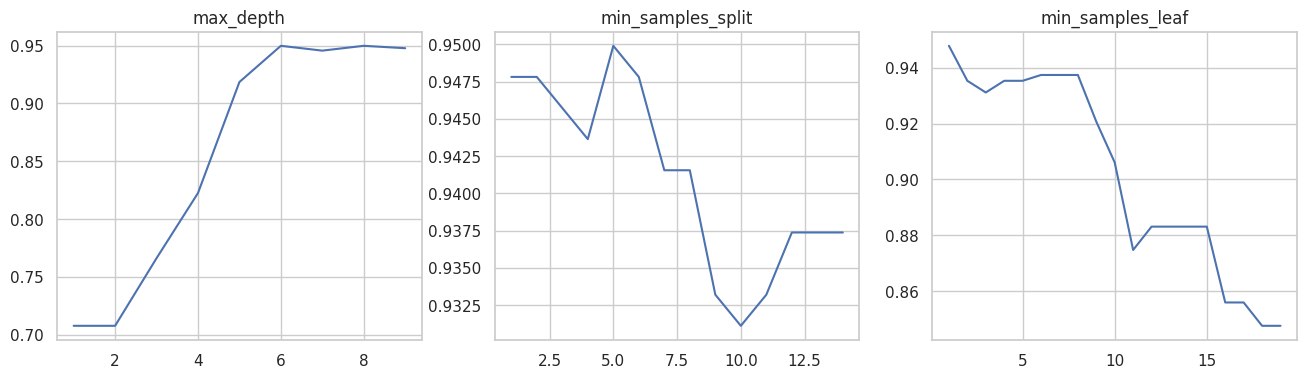

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_ttt, y_ttt, test_size=0.5, random_state=42)

params_grid = {
    'max_depth': range(1, 10),
    'min_samples_split': range(1, 15),
    'min_samples_leaf': range(1, 20)
}

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for i, (param_name, param_grid) in enumerate(params_grid.items()):
    scores = []
    for param in param_grid:
        dt = DecisionTree(feature_types=['categorical'] * X_train.shape[1], **{param_name: param})
        dt.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, dt.predict(X_test)))

    axes[i].plot(param_grid, scores)
    axes[i].set_title(param_name)

plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [11]:
from hw5code import DecisionTree

In [12]:
dfs, Xs, ys = dict(), dict(), dict()

In [13]:
dfs['mushrooms'] = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
    names=list(range(23))
)
dfs['mushrooms'] = dfs['mushrooms'].apply(LabelEncoder().fit_transform)
Xs['mushrooms'] = dfs['mushrooms'].iloc[:, 1:].to_numpy()
ys['mushrooms'] = dfs['mushrooms'].iloc[:, 0].to_numpy()

In [14]:
dfs['tic-tac-toe'] = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data',
    names=list(range(10))
)
dfs['tic-tac-toe'] = dfs['tic-tac-toe'].apply(LabelEncoder().fit_transform)
Xs['tic-tac-toe'] = dfs['tic-tac-toe'].iloc[:, :-1].to_numpy()
ys['tic-tac-toe'] = dfs['tic-tac-toe'].iloc[:, -1].to_numpy()

In [15]:
dfs['car'] = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
    names=list(range(7))
)
dfs['car'].iloc[dfs['car'].iloc[:, -1] == 'unacc', -1] = 'acc'
dfs['car'].iloc[dfs['car'].iloc[:, -1] == 'vgood', -1] = 'good'

acc_num = dfs['car'].loc[dfs['car'].iloc[:, -1] == 'acc'].shape[0]
good_num = dfs['car'].loc[dfs['car'].iloc[:, -1] == 'good'].shape[0]
assert acc_num + good_num == dfs['car'].shape[0]

dfs['car'] = dfs['car'].apply(LabelEncoder().fit_transform)
Xs['car'] = dfs['car'].iloc[:, :-1].to_numpy()
ys['car'] = dfs['car'].iloc[:, -1].to_numpy()

In [16]:
dfs['nursery'] = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data',
    names=list(range(9))
)
dfs['nursery'].iloc[dfs['nursery'].iloc[:, -1] == 'not_recom', -1] = 'recommend'
dfs['nursery'].iloc[dfs['nursery'].iloc[:, -1] == 'very_recom', -1] = 'priority'
dfs['nursery'].iloc[dfs['nursery'].iloc[:, -1] == 'spec_prior', -1] = 'priority'

recommend_num = dfs['nursery'].loc[dfs['nursery'].iloc[:, -1] == 'recommend'].shape[0]
priority_num = dfs['nursery'].loc[dfs['nursery'].iloc[:, -1] == 'priority'].shape[0]
assert recommend_num + priority_num == dfs['nursery'].shape[0]

dfs['nursery'] = dfs['nursery'].apply(LabelEncoder().fit_transform)
Xs['nursery'] = dfs['nursery'].iloc[:, :-1].to_numpy()
ys['nursery'] = dfs['nursery'].iloc[:, -1].to_numpy()

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [10]:
accuracies_data = pd.DataFrame(columns=['DT real', 'DT categorical', 'DT real ohe', 'DTC sklearn'])
for df_name in dfs.keys():
    accuracies_data.loc[df_name, :] = [0.0 for _ in accuracies_data.columns]

In [12]:
for df_name, X in Xs.items():
    y = ys[df_name]

    models = dict()
    models['DT real'] = DecisionTree(feature_types=['real'] * X.shape[1])
    models['DT categorical'] = DecisionTree(feature_types=['categorical'] * X.shape[1])
    models['DT real ohe'] = Pipeline(steps=[
        ('ohe', OneHotEncoder(sparse=False)),
        ('DT', DecisionTree(feature_types=['real'], feature_shape_on_fit=True))
    ])
    models['DTC sklearn'] = DecisionTreeClassifier()

    for model_name, model in models.items():
        accuracies_data.loc[df_name, model_name] = np.mean(cross_val_score(
            model, X, y, cv=10, scoring=make_scorer(accuracy_score)
        ))

accuracies_data

,DT real,DT categorical,DT real ohe,DTC sklearn
mushrooms,0.999261,1.0,0.999631,0.961123
tic-tac-toe,0.467533,0.541458,0.543575,0.759189
car,0.942647,0.967546,0.919495,0.943285
nursery,0.999691,0.999537,0.999537,0.999691


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

На mushrooms и на nursery всё очень хорошо, но всё же на первом sklearn'овский классификатор выдаёт результат похуже (видимо, засчёт рандомных перестановок внутри него). На tic-tac-toe уже наши классификаторы значительно хуже: DT real перформит хуже всех, что в целом логично - вряд ли позиция в крестиках-ноликах будет хорошо описываться без использования категориального подхода. Наверное, если помансить другие параметры нашего DT из бонуса, мы сможем добиться схожих с sklearn'ом результатов (к сожалению, мне лениво и скоро дедл). Но что более важно, так это общая лютая просадка по качеству, в сравнении с другими датасетами. Причиной этому могут быть два момента: малое количества сэмплов и разбросанность целевой переменной. Например, в датасете car тоже мало данных, но таргет очень близок к 0 (ну или к 1, неважно, очень близок). И даже несмотря на малое количество данных (хотя всё-таки в 2 раза больше), на машинках наши деревья показывают точность намного выше, чем на крестиках ноликах - потому что классы машинок не сбалансированы и разброс по ним меньше.



In [28]:
dfs['car'].describe()

,0,1,2,3,4,5,6
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.077546
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.267534
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,0.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000


Вставьте что угодно, описывающее ваши впечатления от этого задания:

![](final.jpg)

![](final2.jpg)
Всё круто крч!